In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.options.display.float_format = '{: .4f}'.format

In [3]:
data = pd.read_excel("./Data Mining Modeling Assignment.xlsx", sheet_name="Data")

In [4]:
data.head(10)

,Cust_Id,Location,Age,Car Ownership,Income,Home Type,Job Experience,Loan Purpose,Loan Grade,Loan Balance,Interest Rate,loan_status,Default History,Credit History
0,1,Hyderabad,22,0,4425000,RENT,123.0000,PERSONAL,D,2625000,16.0200,1,Y,3
1,2,Pune,21,1,720000,OWN,5.0000,EDUCATION,B,75000,11.1400,0,N,2
2,3,Mumbai,25,1,720000,MORTGAGE,1.0000,MEDICAL,C,412500,12.8700,1,N,3
3,4,Hyderabad,23,1,4912500,RENT,4.0000,MEDICAL,C,2625000,15.2300,1,N,2
4,5,Delhi,24,1,4080000,RENT,8.0000,MEDICAL,C,2625000,14.2700,1,Y,4
5,6,Pune,21,1,742500,OWN,2.0000,VENTURE,A,187500,7.1400,1,N,2
6,7,Mumbai,26,0,5782500,RENT,8.0000,EDUCATION,B,2625000,12.4200,1,N,3
7,8,Bangalore,24,0,5921700,RENT,5.0000,MEDICAL,B,2625000,11.1100,1,N,4
8,9,Delhi,24,1,6225000,RENT,8.0000,PERSONAL,A,2625000,8.9000,1,N,2
9,10,Delhi,21,1,750000,OWN,6.0000,VENTURE,D,120000,14.7400,1,N,3


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Cust_Id          32581 non-null  int64  
 1   Location         32581 non-null  object 
 2   Age              32581 non-null  int64  
 3   Car Ownership    32581 non-null  int64  
 4   Income           32581 non-null  int64  
 5   Home Type        32581 non-null  object 
 6   Job Experience   31686 non-null  float64
 7   Loan Purpose     32581 non-null  object 
 8   Loan Grade       32581 non-null  object 
 9   Loan Balance     32581 non-null  int64  
 10  Interest Rate    29465 non-null  float64
 11  loan_status      32581 non-null  int64  
 12  Default History  32581 non-null  object 
 13  Credit History   32581 non-null  int64  
dtypes: float64(2), int64(7), object(5)
memory usage: 3.5+ MB


In [6]:
data.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [7]:
data.select_dtypes(include = ['object']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Location         32581 non-null  object
 1   Home Type        32581 non-null  object
 2   Loan Purpose     32581 non-null  object
 3   Loan Grade       32581 non-null  object
 4   Default History  32581 non-null  object
dtypes: object(5)
memory usage: 1.2+ MB


In [8]:
data.select_dtypes(include = ['object']).describe()

,Location,Home Type,Loan Purpose,Loan Grade,Default History
count,32581,32581,32581,32581,32581
unique,7,4,6,7,2
top,Delhi,RENT,EDUCATION,A,N
freq,4732,16446,6453,10777,26836


In [9]:
data.select_dtypes(include = ['object']).head(6)

,Location,Home Type,Loan Purpose,Loan Grade,Default History
0,Hyderabad,RENT,PERSONAL,D,Y
1,Pune,OWN,EDUCATION,B,N
2,Mumbai,MORTGAGE,MEDICAL,C,N
3,Hyderabad,RENT,MEDICAL,C,N
4,Delhi,RENT,MEDICAL,C,Y
5,Pune,OWN,VENTURE,A,N


In [10]:
data.isnull().sum()/len(data)*100

Cust_Id            0.0000
Location           0.0000
Age                0.0000
Car Ownership      0.0000
Income             0.0000
Home Type          0.0000
Job Experience     2.7470
Loan Purpose       0.0000
Loan Grade         0.0000
Loan Balance       0.0000
Interest Rate      9.5639
loan_status        0.0000
Default History    0.0000
Credit History     0.0000
dtype: float64

In [11]:
data.set_index('Cust_Id' , inplace = True)

In [12]:
data.head()

,Location,Age,Car Ownership,Income,Home Type,Job Experience,Loan Purpose,Loan Grade,Loan Balance,Interest Rate,loan_status,Default History,Credit History
Cust_Id,,,,,,,,,,,,,
1,Hyderabad,22,0,4425000,RENT,123.0000,PERSONAL,D,2625000,16.0200,1,Y,3
2,Pune,21,1,720000,OWN,5.0000,EDUCATION,B,75000,11.1400,0,N,2
3,Mumbai,25,1,720000,MORTGAGE,1.0000,MEDICAL,C,412500,12.8700,1,N,3
4,Hyderabad,23,1,4912500,RENT,4.0000,MEDICAL,C,2625000,15.2300,1,N,2
5,Delhi,24,1,4080000,RENT,8.0000,MEDICAL,C,2625000,14.2700,1,Y,4


In [13]:
data.select_dtypes(exclude = ['object']).describe()

,Age,Car Ownership,Income,Job Experience,Loan Balance,Interest Rate,loan_status,Credit History
count,32581.0000,32581.0000,32581.0000,31686.0000,32581.0000,29465.0000,32581.0000,32581.0000
mean,27.7346,0.5006,4955613.6352,4.7897,719202.8329,11.0117,0.2182,5.8042
std,6.3481,0.5000,4648733.9376,4.1426,474156.4984,3.2405,0.4130,4.0550
min,20.0000,0.0000,300000.0000,0.0000,37500.0000,5.4200,0.0000,2.0000
25%,23.0000,0.0000,2887500.0000,2.0000,375000.0000,7.9000,0.0000,3.0000
50%,26.0000,1.0000,4125000.0000,4.0000,600000.0000,10.9900,0.0000,4.0000
75%,30.0000,1.0000,5940000.0000,7.0000,915000.0000,13.4700,0.0000,8.0000
max,144.0000,1.0000,450000000.0000,123.0000,2625000.0000,23.2200,1.0000,30.0000


In [14]:
len(data[data['loan_status'] == 1])/len(data['loan_status'])*100

21.816396059052824

In [15]:
data.select_dtypes(exclude = ['object']).columns

Index(['Age', 'Car Ownership', 'Income', 'Job Experience', 'Loan Balance',
       'Interest Rate', 'loan_status', 'Credit History'],
      dtype='object')

In [16]:
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# sns.set_style('whitegrid')

In [17]:
temp = data.drop(columns = ['loan_status'])
col = temp.select_dtypes(exclude = ['object']).columns

In [18]:
col

Index(['Age', 'Car Ownership', 'Income', 'Job Experience', 'Loan Balance',
       'Interest Rate', 'Credit History'],
      dtype='object')

In [19]:
col_obj = data.select_dtypes(include = ['object']).columns

In [20]:
col_obj

Index(['Location', 'Home Type', 'Loan Purpose', 'Loan Grade',
       'Default History'],
      dtype='object')

In [21]:
def plot_grid(data, fig_size, grid_size, plot_type, target = ''):
    fig = plt.figure(figsize = fig_size)
    if plot_type == 'histplot':
        for i, column_name in enumerate(col):
            fig.add_subplot(grid_size[0], grid_size[1], i + 1)
            plot = sns.histplot(x = data[column_name],hue = data[target], kde = True, palette = {0 : 'black', 1 : 'royalblue'}, stat = 'count')
    if plot_type == 'boxplot':
        for i, column_name in enumerate(data.select_dtypes(exclude = 'object').columns):
            fig.add_subplot(grid_size[0], grid_size[1], i + 1)
            plot = sns.boxplot(x = data[column_name], color = 'red')
    if plot_type == 'countplot':
#         target = data[target]
        for i, column_name in enumerate(col_obj):
            fig.add_subplot(grid_size[0], grid_size[1], i + 1)
            plot = sns.countplot(x = data[column_name], hue = data[target], palette = {0 : 'black', 1 : 'royalblue'})
#             plot.legend(loc = 'upper right', title = target.name)
    plt.tight_layout()

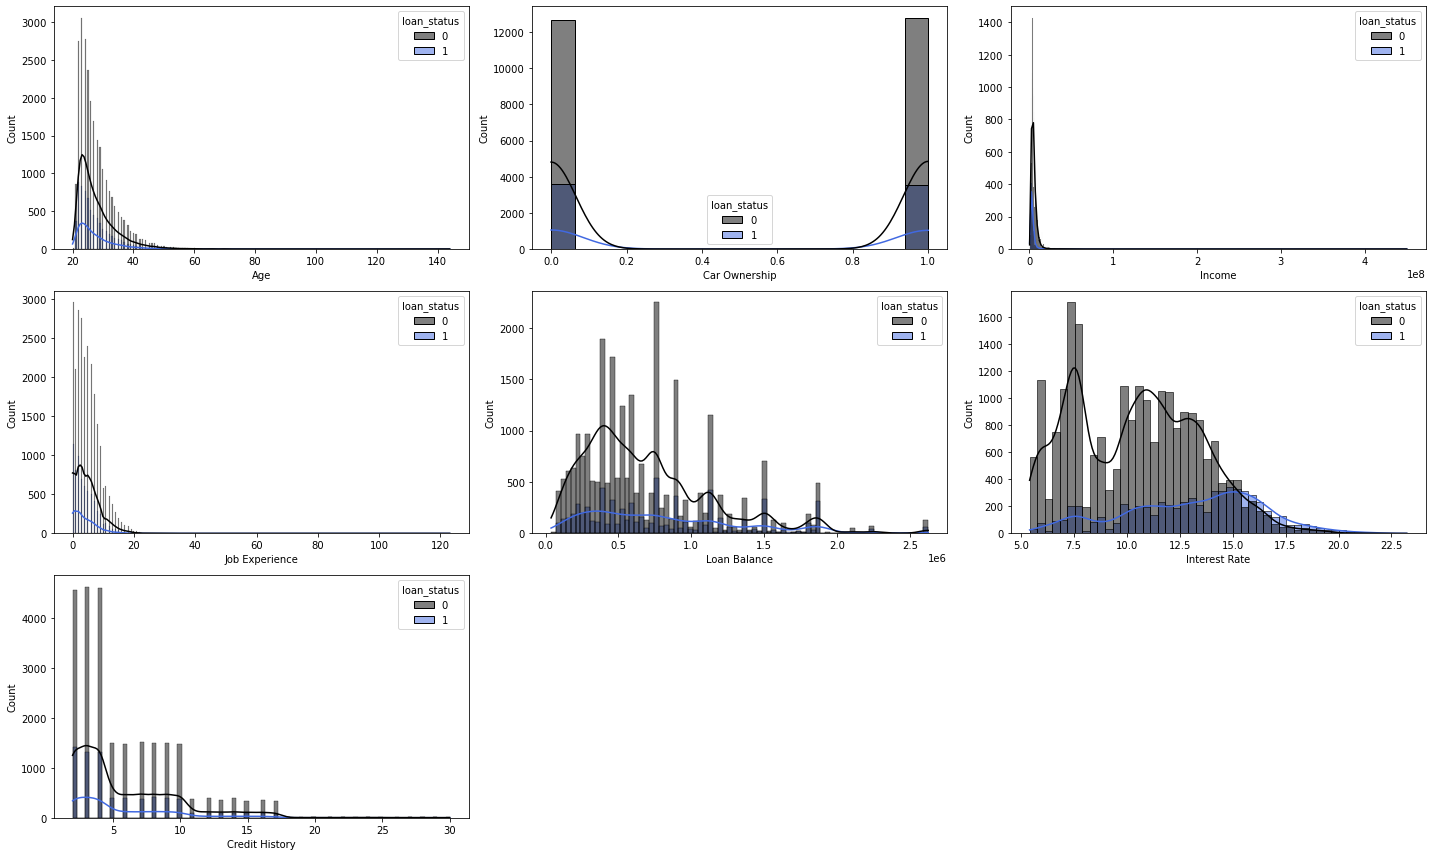

In [22]:
plot_grid(data, (20,12), (3,3), 'histplot', target = 'loan_status')

In [23]:
print("max and min Incomes are", data['Income'].max() ,"and" ,data['Income'].min() , "respectively")

max and min Incomes are 450000000 and 300000 respectively


Converting the incomes to log of incomes  because the incomes were heavily skewed towards the right

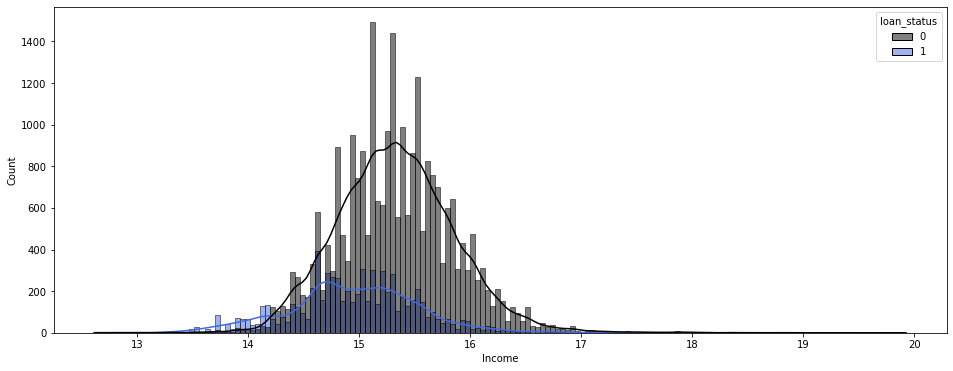

In [24]:
fig, ax =  plt.subplots(figsize = (16,6))
plot = sns.histplot(x = np.log(data['Income']),hue = data['loan_status'], kde = True, palette = {0 : 'black', 1 : 'royalblue'},ax = ax, stat = 'count')
# ax.set_xlim(300000,25000000)

In [25]:
len(data[data['Income'] > 25000000])

118

In [26]:
len(data[data['Income'] < 25000000])

32463

outliers in Age

In [27]:
print('Number of people with age greater than 95 :',len(data[data['Age'] > 95]),'\nNumber of people with age less than 95:',len(data[data['Age'] < 95]))
#we can discard age more than 100 which are very few in numbers

Number of people with age greater than 95 : 5 
Number of people with age less than 95: 32576


In [28]:
data[data['Age']>95]

,Location,Age,Car Ownership,Income,Home Type,Job Experience,Loan Purpose,Loan Grade,Loan Balance,Interest Rate,loan_status,Default History,Credit History
Cust_Id,,,,,,,,,,,,,
82,Delhi,144,1,18750000,RENT,4.0000,VENTURE,C,360000,13.5700,0,N,3
184,Kolkata,144,1,15000000,MORTGAGE,4.0000,EDUCATION,B,450000,11.8600,0,N,2
576,Kolkata,123,1,6000300,RENT,2.0000,EDUCATION,B,1530000,10.2500,0,N,3
748,Chennai,123,1,5850000,RENT,7.0000,VENTURE,B,1500000,nan,0,N,4
32298,Mumbai,144,0,450000000,MORTGAGE,12.0000,PERSONAL,C,375000,12.7300,0,N,25


In [29]:
len(data[data['Job Experience'] > 30])

9

In [30]:
data[data['Job Experience'] > 30]

,Location,Age,Car Ownership,Income,Home Type,Job Experience,Loan Purpose,Loan Grade,Loan Balance,Interest Rate,loan_status,Default History,Credit History
Cust_Id,,,,,,,,,,,,,
1,Hyderabad,22,0,4425000,RENT,123.0000,PERSONAL,D,2625000,16.0200,1,Y,3
211,Hyderabad,21,1,14400000,MORTGAGE,123.0000,VENTURE,A,1500000,6.5400,0,N,4
30915,Hyderabad,48,1,5250000,MORTGAGE,31.0000,HOMEIMPROVEMENT,D,675000,14.5400,0,N,17
31867,Chennai,47,0,13350000,OWN,31.0000,VENTURE,B,675000,10.9900,0,N,17
31868,Kolkata,46,1,13500000,MORTGAGE,31.0000,VENTURE,B,1350000,9.9100,0,N,11
32264,Bangalore,46,1,13500000,MORTGAGE,31.0000,MEDICAL,B,1350000,9.9100,0,N,12
32356,Delhi,78,0,3600000,RENT,41.0000,MEDICAL,A,225000,7.5100,0,N,25
32429,Hyderabad,58,1,3675000,MORTGAGE,34.0000,MEDICAL,D,562500,13.5500,1,Y,24
32516,Pune,53,0,7950000,MORTGAGE,38.0000,PERSONAL,B,1500000,9.8800,0,N,23


There are Two observations with job experience unnaturally high of 123 years

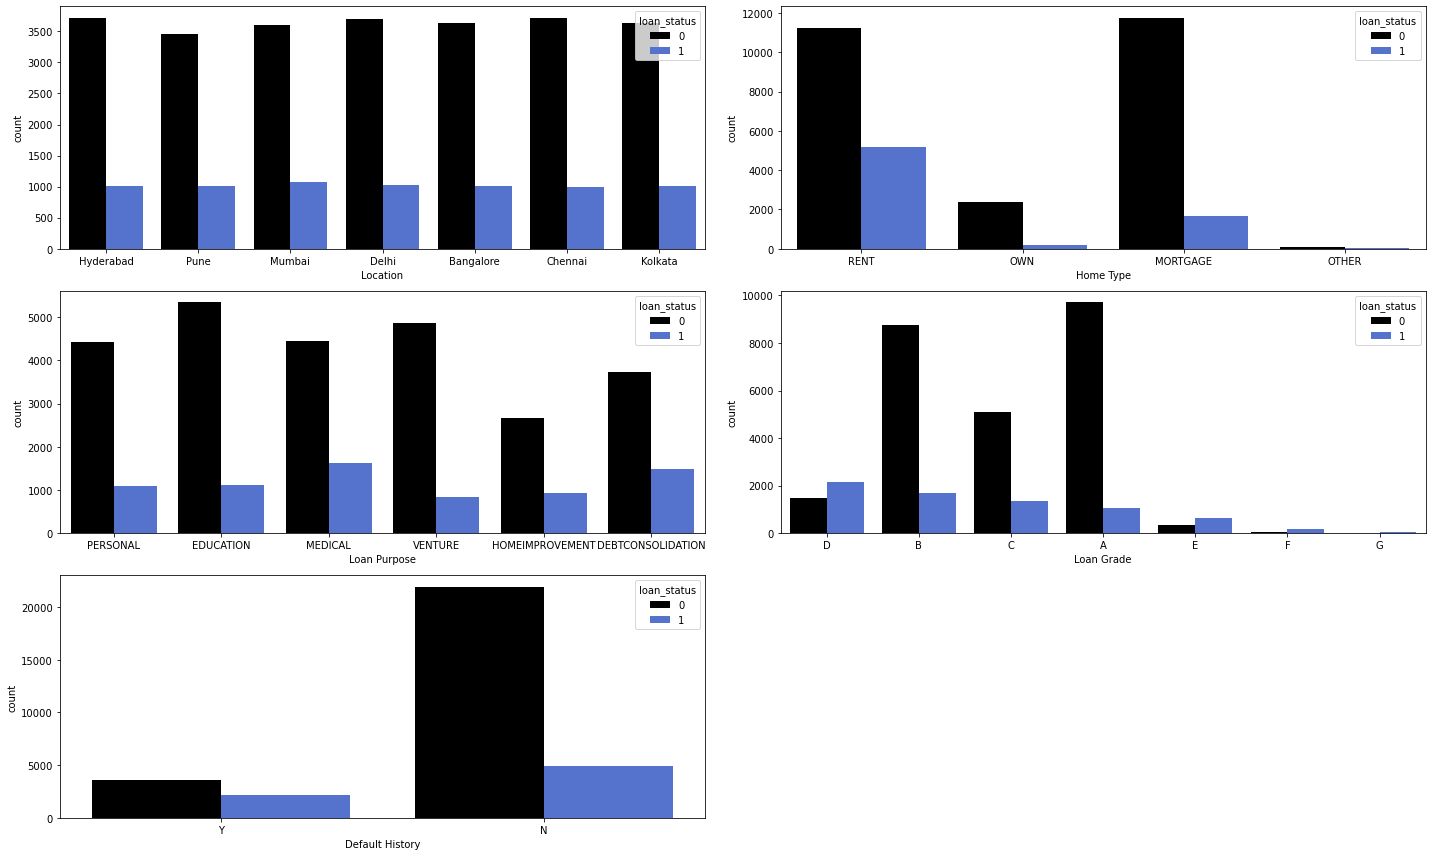

In [31]:
plot_grid(data, (20,12), (3,2), 'countplot', target = 'loan_status')

In [32]:
len(data[data['Home Type'] == 'OTHER'])

107

In [33]:
data1 = pd.read_excel("./Data Mining Modeling Assignment.xlsx", sheet_name="Data")

In [34]:
def pivot(index):
    pivot_tbl = pd.pivot_table(data1 , index = index , columns = 'loan_status' ,values = 'Cust_Id' , aggfunc = 'count')
    total = pivot_tbl[0]+pivot_tbl[1]
    pivot_tbl['default perc'] = pivot_tbl[1]/total*100
#     pivot_tbl.reset_index(drop = True, inplace = True)
    return pivot_tbl.sort_values(by = ['default perc'] , ascending = False)

In [35]:
pivot('Loan Purpose')

loan_status,0,1,default perc
Loan Purpose,,,
DEBTCONSOLIDATION,3722,1490,28.5879
MEDICAL,4450,1621,26.7007
HOMEIMPROVEMENT,2664,941,26.1026
PERSONAL,4423,1098,19.8877
EDUCATION,5342,1111,17.2168
VENTURE,4872,847,14.8103


In [36]:
pivot('Location')

loan_status,0,1,default perc
Location,,,
Mumbai,3609,1069,22.8516
Pune,3458,1002,22.4664
Delhi,3703,1029,21.7456
Kolkata,3638,1009,21.7129
Bangalore,3635,1004,21.6426
Hyderabad,3714,1002,21.2468
Chennai,3716,993,21.0873


In [37]:
pivot('Home Type')

loan_status,0,1,default perc
Home Type,,,
RENT,11254,5192,31.5700
OTHER,74,33,30.8411
MORTGAGE,11754,1690,12.5707
OWN,2391,193,7.4690


In [38]:
pivot('Loan Grade')

loan_status,0,1,default perc
Loan Grade,,,
G,1,63,98.4375
F,71,170,70.5394
E,343,621,64.4191
D,1485,2141,59.0458
C,5119,1339,20.7340
B,8750,1701,16.2760
A,9704,1073,9.9564


In [39]:
pivot('Default History')

loan_status,0,1,default perc
Default History,,,
Y,3573,2172,37.8068
N,21900,4936,18.3932


In [40]:
def pivot_plot(index,colour):
    pivot_tbl = pd.pivot_table(data1 , index = index , columns = 'loan_status' ,values = 'Cust_Id' , aggfunc = 'count')
    total = pivot_tbl[0]+pivot_tbl[1]
    pivot_tbl['default perc'] = pivot_tbl[1]/total*100
    pivot_tbl = pivot_tbl.drop(columns = [0,1]).sort_values(by = ['default perc'], ascending = False)
#     plt.figure(figsize = (10,5))
    return sns.barplot(x=pivot_tbl.index.values,  y=pivot_tbl['default perc'] , palette = colour)

In [41]:
def pivot_plot_all(fig_size, grid_size, colour):
    fig = plt.figure(figsize = fig_size)
    for i, column_name in enumerate(col_obj):
        fig.add_subplot(grid_size[0], grid_size[1], i + 1)
        plot = pivot_plot(column_name,colour)
        plot.set_title(column_name)
    plt.tight_layout()

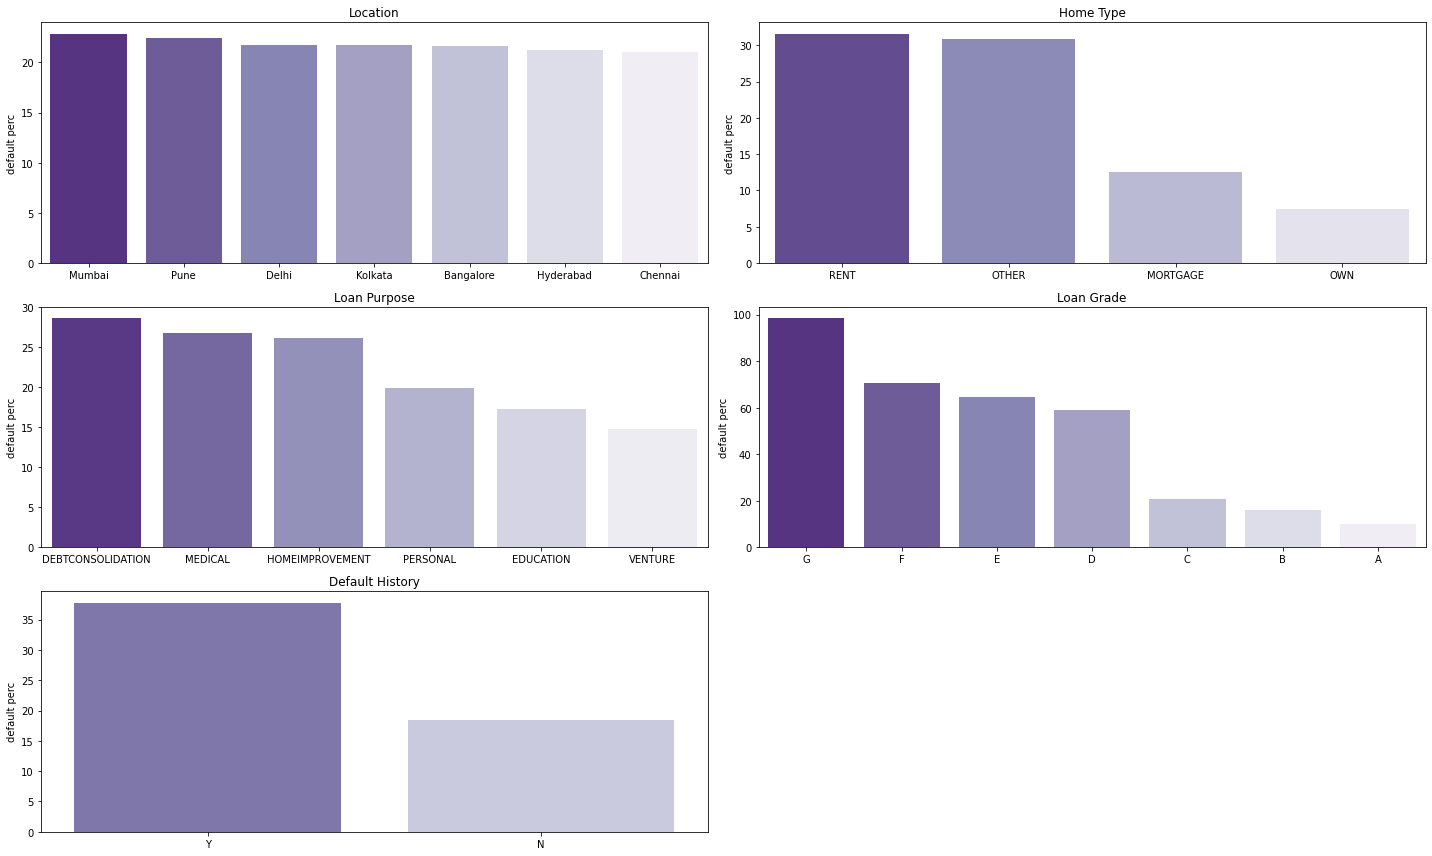

In [42]:
#Function which plots the default percentage based on Location,HomeType,Loan purpose,loanGrade,DefaultHistory
pivot_plot_all((20,12),(3,2),'Purples_r')

<AxesSubplot:>

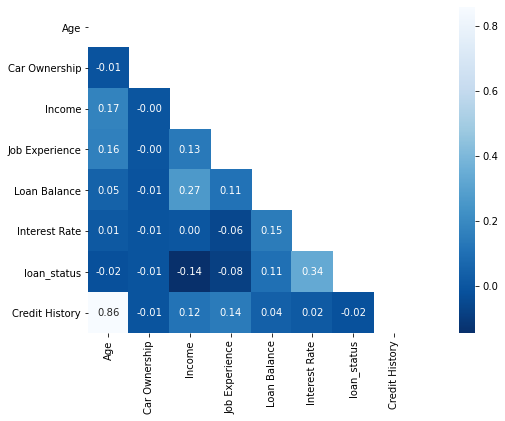

In [43]:
plt.figure(figsize = (16, 6))
sns.heatmap(data.corr(), 
            annot = True,
            fmt = '.2f',
            square = True,
            cmap = "Blues_r", 
            mask = np.triu(data.corr()))

CreditHistory and Age are Heavily Correlated

In [44]:
data.isnull().sum()/len(data)*100

Location           0.0000
Age                0.0000
Car Ownership      0.0000
Income             0.0000
Home Type          0.0000
Job Experience     2.7470
Loan Purpose       0.0000
Loan Grade         0.0000
Loan Balance       0.0000
Interest Rate      9.5639
loan_status        0.0000
Default History    0.0000
Credit History     0.0000
dtype: float64

In [45]:
def interaction(col_null,grid_size,fig_size,colour):
    fig = plt.figure(figsize = fig_size)
    for i, column_name in enumerate(col_obj):
        tmp = data.groupby(column_name)[col_null].mean()
        tmp_pd = pd.DataFrame(tmp).sort_values(by = [col_null] , ascending = False)
        fig.add_subplot(grid_size[0], grid_size[1], i + 1)
        plot = sns.barplot(x=tmp_pd.index.values,  y=tmp_pd[col_null] , palette = colour)
        plot.set_title(column_name)
    plt.tight_layout()
    

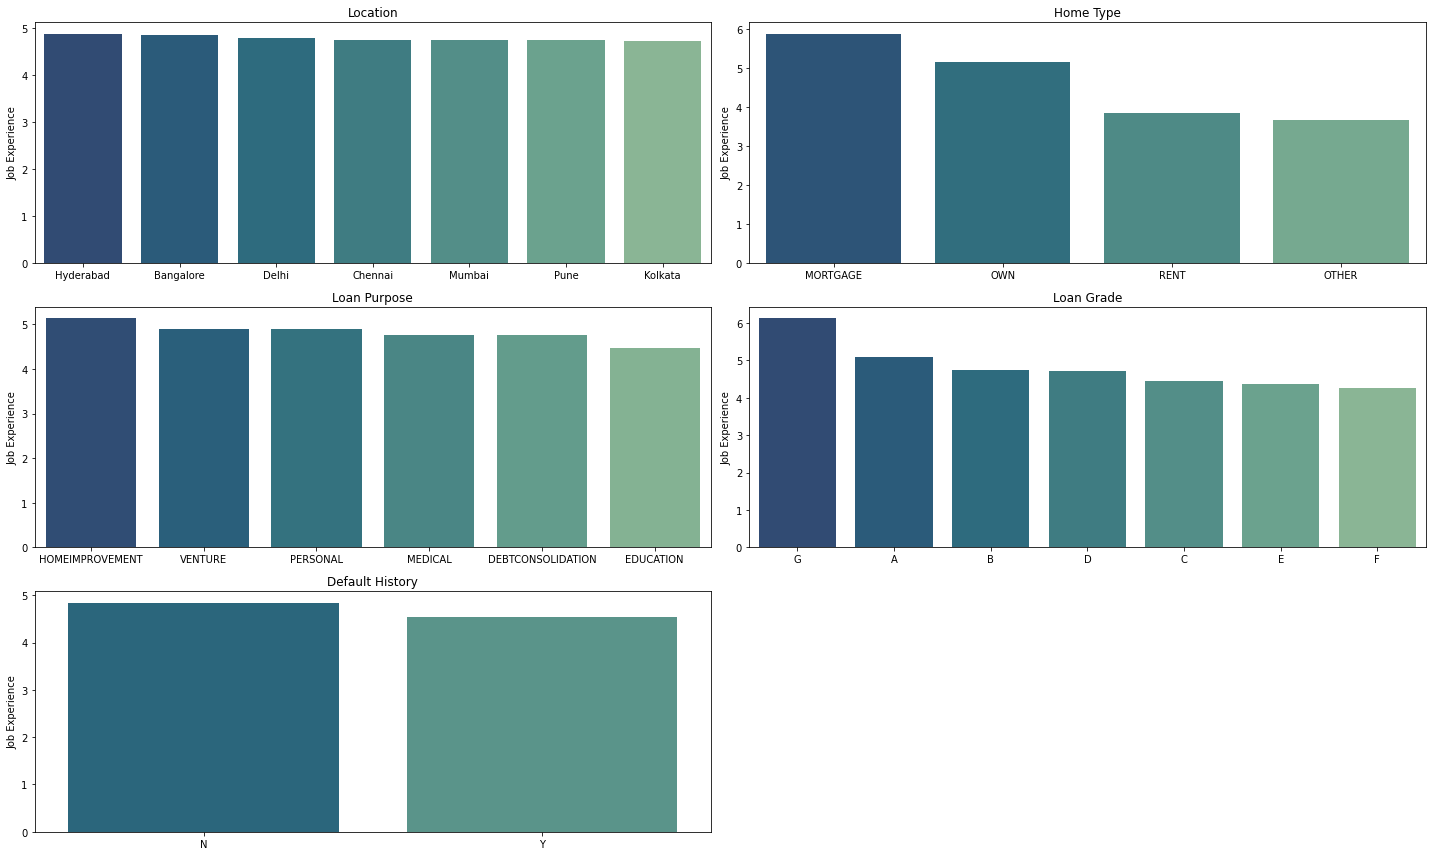

In [46]:
#interaction of job experience with the different categorical variables
interaction('Job Experience',(3,2),(20,12),'crest_r')

we can see from the above graphs that the job experience(Containing null values) vary with the different classes of the categorical variables 
So we can take the mean job experience with respect to the different classes of any one categorical variable to impute the missing job exp values

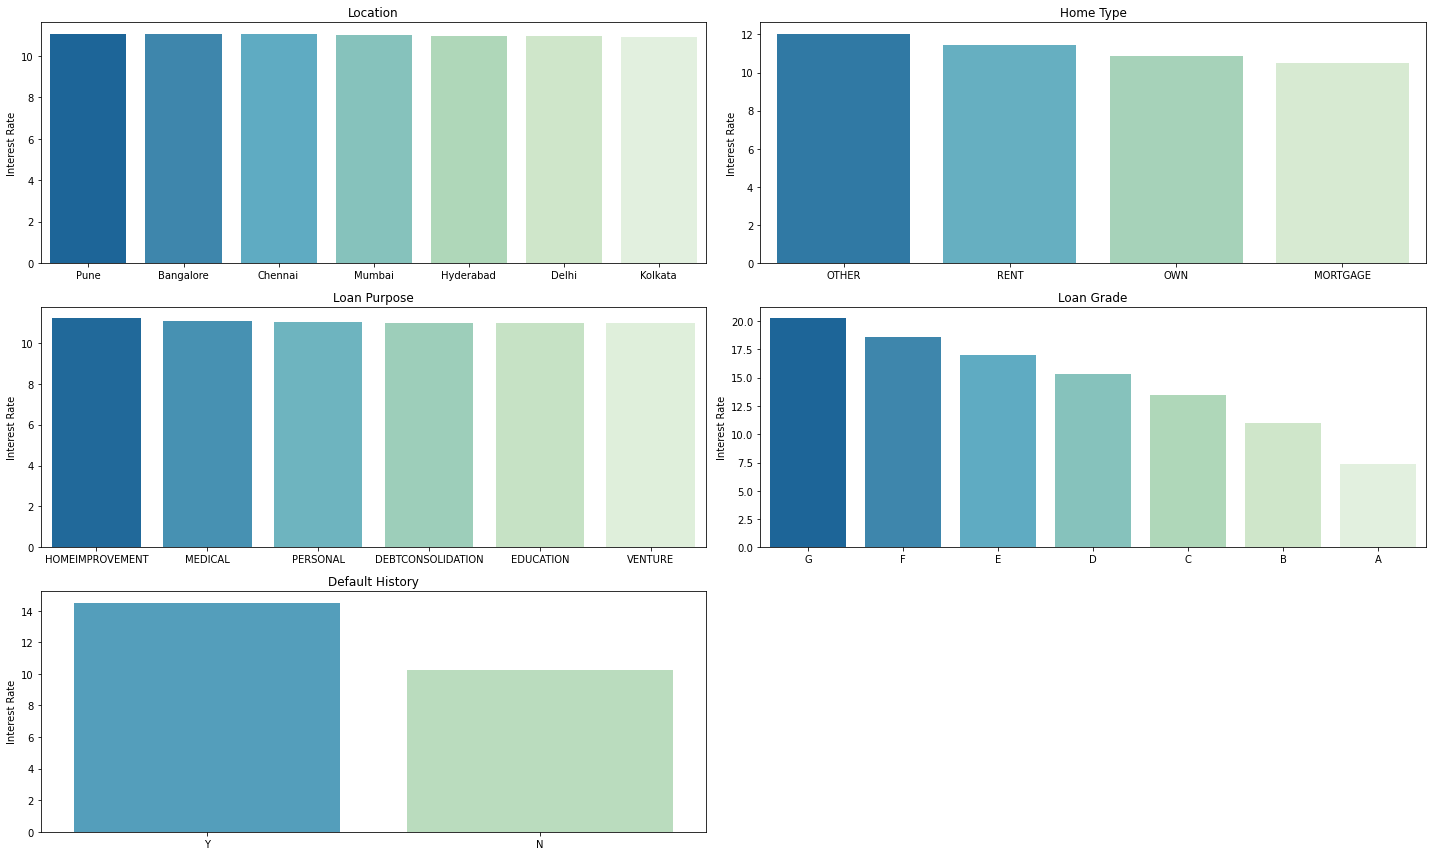

In [47]:
#interaction of interset rate with the different categorical variables
interaction('Interest Rate',(3,2),(20,12),'GnBu_r')

we can see from the above graphs that the interest rate(Containing null values) vary with the different classes of the categorical variables 
So we can take the mean interest rate with respect to the different classes of any one categorical variable to impute the missing values

# Data Preprocessing

## Removing Outliers

In [3]:
data = pd.read_excel("./Data Mining Modeling Assignment.xlsx", sheet_name="Data")
data = data.loc[(data["Job Experience"] != 123)]
data = data.loc[(data["Age"] <= 100 )]

## Imputing null Values

In [4]:
data.isna().sum()/len(data) * 100

Cust_Id            0.000000
Location           0.000000
Age                0.000000
Car Ownership      0.000000
Income             0.000000
Home Type          0.000000
Job Experience     2.747590
Loan Purpose       0.000000
Loan Grade         0.000000
Loan Balance       0.000000
Interest Rate      9.562842
loan_status        0.000000
Default History    0.000000
Credit History     0.000000
dtype: float64

In [5]:
data["Interest Rate"].mean()

11.011528565123772

### Imputing Interest rate based on the Loan Grade

In [6]:
impute_interest_rate = round(data.groupby(["Loan Grade"])["Interest Rate"].mean(),2)
#impute_interest_rate = impute_interest_rate.reset_index()
impute_interest_rate

Loan Grade
A     7.33
B    11.00
C    13.46
D    15.36
E    17.01
F    18.61
G    20.25
Name: Interest Rate, dtype: float64

In [7]:
for row in data.index:
    data.at[row,'Interest Rate'] = np.where(pd.isnull(data.at[row,'Interest Rate']), 
                                    impute_interest_rate.loc[(impute_interest_rate.index == data.at[row,'Loan Grade'])],data.at[row,'Interest Rate'])

### Imputation for the Interest Rate is done !!!

In [8]:
data.isna().sum()/len(data) * 100

Cust_Id            0.00000
Location           0.00000
Age                0.00000
Car Ownership      0.00000
Income             0.00000
Home Type          0.00000
Job Experience     2.74759
Loan Purpose       0.00000
Loan Grade         0.00000
Loan Balance       0.00000
Interest Rate      0.00000
loan_status        0.00000
Default History    0.00000
Credit History     0.00000
dtype: float64

### Imputing Job Experience based on the age

In [9]:
job_expe_grp_by = round(data.groupby(["Age"])["Job Experience"].mean(), 2)

In [10]:
for row in data.index:
    data.at[row,'Job Experience'] = np.where(pd.isnull(data.at[row,'Job Experience']), 
                                    job_expe_grp_by.loc[(job_expe_grp_by.index == data.at[row,'Age']),],data.at[row,'Job Experience'])

### Imputation of Job Experience is done

In [11]:
data.isna().sum()/len(data) * 100

Cust_Id            0.0
Location           0.0
Age                0.0
Car Ownership      0.0
Income             0.0
Home Type          0.0
Job Experience     0.0
Loan Purpose       0.0
Loan Grade         0.0
Loan Balance       0.0
Interest Rate      0.0
loan_status        0.0
Default History    0.0
Credit History     0.0
dtype: float64

## One Hot Encoding for the Categorical Variable

In [12]:
data_location = pd.get_dummies(data.Location, prefix = 'Location')
data_Home_Type = pd.get_dummies(data["Home Type"], prefix = 'Home_Type')
data_Loan_Purpose = pd.get_dummies(data["Loan Purpose"], prefix = 'Loan_Purpose')
data_Loan_Grade = pd.get_dummies(data["Loan Grade"], prefix = 'Loan_Grade')
data_Default_History = pd.get_dummies(data["Default History"], prefix = 'Default_History')

In [13]:
data1 = pd.concat([data, data_Home_Type, data_Loan_Grade, data_Loan_Purpose, data_Default_History, data_location], axis = 1 )

In [14]:
data1.drop(['Location','Home Type', "Loan Purpose", "Loan Grade", "Default History"], axis = 1, inplace = True)
data1.head()

,Cust_Id,Age,Car Ownership,Income,Job Experience,Loan Balance,Interest Rate,loan_status,Credit History,Home_Type_MORTGAGE,...,Loan_Purpose_VENTURE,Default_History_N,Default_History_Y,Location_Bangalore,Location_Chennai,Location_Delhi,Location_Hyderabad,Location_Kolkata,Location_Mumbai,Location_Pune
1,2,21,1,720000,5.0,75000,11.14,0,2,0,...,0,1,0,0,0,0,0,0,0,1
2,3,25,1,720000,1.0,412500,12.87,1,3,1,...,0,1,0,0,0,0,0,0,1,0
3,4,23,1,4912500,4.0,2625000,15.23,1,2,0,...,0,1,0,0,0,0,1,0,0,0
4,5,24,1,4080000,8.0,2625000,14.27,1,4,0,...,0,0,1,0,0,1,0,0,0,0
5,6,21,1,742500,2.0,187500,7.14,1,2,0,...,1,1,0,0,0,0,0,0,0,1


In [15]:
print(data["Default History"].value_counts())
print(data["Home Type"].value_counts())
print(data["Loan Grade"].value_counts())
print(data["Loan Purpose"].value_counts())
print(data["Location"].value_counts())

N    26830
Y     5744
Name: Default History, dtype: int64
RENT        16442
MORTGAGE    13441
OWN          2584
OTHER         107
Name: Home Type, dtype: int64
A    10776
B    10448
C     6456
D     3625
E      964
F      241
G       64
Name: Loan Grade, dtype: int64
EDUCATION            6451
MEDICAL              6071
VENTURE              5716
PERSONAL             5519
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: Loan Purpose, dtype: int64
Delhi        4731
Hyderabad    4714
Chennai      4708
Mumbai       4677
Kolkata      4645
Bangalore    4639
Pune         4460
Name: Location, dtype: int64


In [16]:
data1.drop(["Default_History_N"],axis=1,inplace = True)
data1.drop(["Home_Type_RENT"],axis=1, inplace=True)
data1.drop(["Loan_Grade_A"], axis = 1, inplace = True)
data1.drop(["Loan_Purpose_EDUCATION"], axis = 1, inplace=True)
data1.drop(["Location_Delhi"], axis=1,inplace=True)

### After removing one columns from each encoded variables the variable inflation factor is less

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
X = data1.assign(const = 1)
pd.Series([variance_inflation_factor(X.values,i)
          for i in range(X.shape[1])],
         index = X.columns)

Cust_Id                             2.790830
Age                                 4.700525
Car Ownership                       1.001209
Income                              1.238415
Job Experience                      1.111433
Loan Balance                        1.189750
Interest Rate                      11.332626
loan_status                         1.351648
Credit History                      5.037011
Home_Type_MORTGAGE                  1.272556
Home_Type_OTHER                     1.005041
Home_Type_OWN                       1.121237
Loan_Grade_B                        4.540369
Loan_Grade_C                        8.274207
Loan_Grade_D                        8.586551
Loan_Grade_E                        4.121916
Loan_Grade_F                        2.070440
Loan_Grade_G                        1.380119
Loan_Purpose_DEBTCONSOLIDATION      1.543800
Loan_Purpose_HOMEIMPROVEMENT        1.416483
Loan_Purpose_MEDICAL                1.600966
Loan_Purpose_PERSONAL               1.553560
Loan_Purpo

## To handle Class Imbalance, Resampling the data 

In [50]:
loan_status_0_count=data1.loan_status.value_counts()[0]
loan_status_1_count=data1.loan_status.value_counts()[1]
print("count of 0 is ", loan_status_0_count, " Count of 1 is ", loan_status_1_count)

count of 0 is  25467  Count of 1 is  7107


In [52]:
loan_1=data1.loc[data1["loan_status"]==1]
loan_0=data1.loc[data1["loan_status"]==0]

total class of 1 and 0: 0    25467
1     7107
Name: loan_status, dtype: int64


<AxesSubplot:title={'center':'count (target)'}>

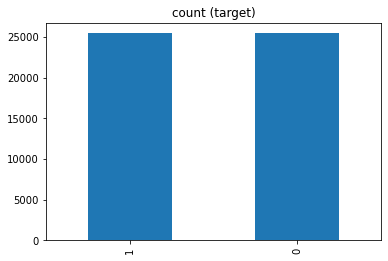

In [53]:
data_sample_1 = loan_1.sample(loan_status_0_count, replace=True)

data_2 = pd.concat([data_sample_1, loan_0], axis=0)

print("total class of 1 and 0:",data1['loan_status'].value_counts())# plot the count after under-sampeling
data_2['loan_status'].value_counts().plot(kind='bar', title='count (target)')

In [18]:
import sklearn
from sklearn.model_selection import train_test_split

In [75]:
#Test Train Split

#Train and test split
from sklearn import preprocessing
Y_data = data_2['loan_status']
X_data = data_2.drop('loan_status',axis=1)

X_data = preprocessing.StandardScaler().fit(X_data).transform(X_data.astype(float))
x_train, x_test, y_train, y_test = train_test_split(X_data, Y_data, test_size = .2)

In [64]:
def model_assess(model, name='Default'):
    model.fit(x_train, y_train)
    preds = model.predict(x_test)
    #preds_proba = model.predict_proba(x_test)
    print('                   ', name, '\n',classification_report(y_test, model.predict(x_test)))

In [35]:
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier

## KNN

In [76]:
#KNN
knnneigh = KNeighborsClassifier(n_neighbors=8)
model_assess(knnneigh, name='KNN')

                    KNN 
               precision    recall  f1-score   support

           0       0.80      0.82      0.81      5116
           1       0.82      0.79      0.80      5071

    accuracy                           0.81     10187
   macro avg       0.81      0.81      0.81     10187
weighted avg       0.81      0.81      0.81     10187



## Logistic Regression

In [77]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=0)
model_assess(logreg, 'Logistic Regression')

                    Logistic Regression 
               precision    recall  f1-score   support

           0       0.80      0.81      0.80      5116
           1       0.80      0.80      0.80      5071

    accuracy                           0.80     10187
   macro avg       0.80      0.80      0.80     10187
weighted avg       0.80      0.80      0.80     10187



## XG Boosting

In [79]:
#XGB
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

In [80]:
xgb = xgb.XGBClassifier(objective="binary:logistic", random_state=42) 
model_assess(xgb, 'XGBoost')

D:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:08:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
                    XGBoost 
               precision    recall  f1-score   support

           0       0.93      0.96      0.94      5116
           1       0.96      0.92      0.94      5071

    accuracy                           0.94     10187
   macro avg       0.94      0.94      0.94     10187
weighted avg       0.94      0.94      0.94     10187



## Decision Trees

In [81]:

from sklearn.tree import DecisionTreeClassifier
Dec_tree = DecisionTreeClassifier(max_depth=10, min_samples_split=2, min_samples_leaf=1, random_state=42)
model_assess(Dec_tree, 'DecisionTree Classifier')

                    DecisionTree Classifier 
               precision    recall  f1-score   support

           0       0.82      0.94      0.88      5116
           1       0.93      0.79      0.86      5071

    accuracy                           0.87     10187
   macro avg       0.87      0.87      0.87     10187
weighted avg       0.87      0.87      0.87     10187



## Random Forest

In [82]:
from sklearn.ensemble import RandomForestClassifier

In [83]:
r_forest = RandomForestClassifier(n_estimators=500, bootstrap=True, max_features='sqrt')
model_assess(r_forest, 'Random Forest')

                    Random Forest 
               precision    recall  f1-score   support

           0       0.98      0.97      0.98      5116
           1       0.98      0.98      0.98      5071

    accuracy                           0.98     10187
   macro avg       0.98      0.98      0.98     10187
weighted avg       0.98      0.98      0.98     10187



## Hierarchial Clustering

In [84]:
from sklearn.cluster import AgglomerativeClustering

In [85]:
import scipy.cluster.hierarchy as sch

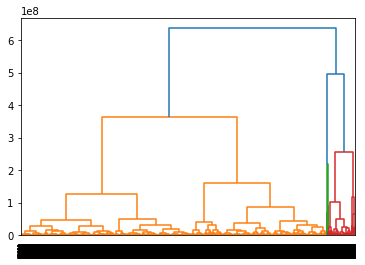

In [32]:
dendrogram = sch.dendrogram(sch.linkage(data1, method='ward'))

In [86]:
hr_cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
#Hrcl_Cluster = AgglomerativeClustering(n_clusters=4, linkage='complete').fit(data1)
#model_assess(hr_cluster, 'Hierarchial Clustering')
hr_cluster.fit(x_train, y_train)
preds = hr_cluster.fit_predict(x_test)
print('                   ', "Hierarchial Clustering", '\n',classification_report(y_test, preds))

                    Hierarchial Clustering 
               precision    recall  f1-score   support

           0       0.60      0.83      0.70      5116
           1       0.85      0.09      0.16      5071
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0

    accuracy                           0.46     10187
   macro avg       0.36      0.23      0.21     10187
weighted avg       0.72      0.46      0.43     10187



D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## SVM

In [35]:
from sklearn.svm import LinearSVC
from sklearn import svm

In [ ]:
support_vect = svm.SVC(kernel='linear')
model_assess(support_vect, 'SVM')

## K Means

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [87]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
model_assess(kmeans, 'K means')
#preds = kmeans.fit_predict(x_test)
#print('                   ', "Hierarchial Clustering", '\n',classification_report(y_test, preds))

                    K means 
               precision    recall  f1-score   support

           0       0.32      0.28      0.29      5116
           1       0.35      0.40      0.37      5071

    accuracy                           0.34     10187
   macro avg       0.33      0.34      0.33     10187
weighted avg       0.33      0.34      0.33     10187



In [46]:
data1.loan_status.value_counts()

0    25467
1     7107
Name: loan_status, dtype: int64

## ROC Curve

In [91]:
from sklearn import model_selection,linear_model, metrics
from sklearn.metrics import auc, accuracy_score, confusion_matrix, roc_auc_score, classification_report

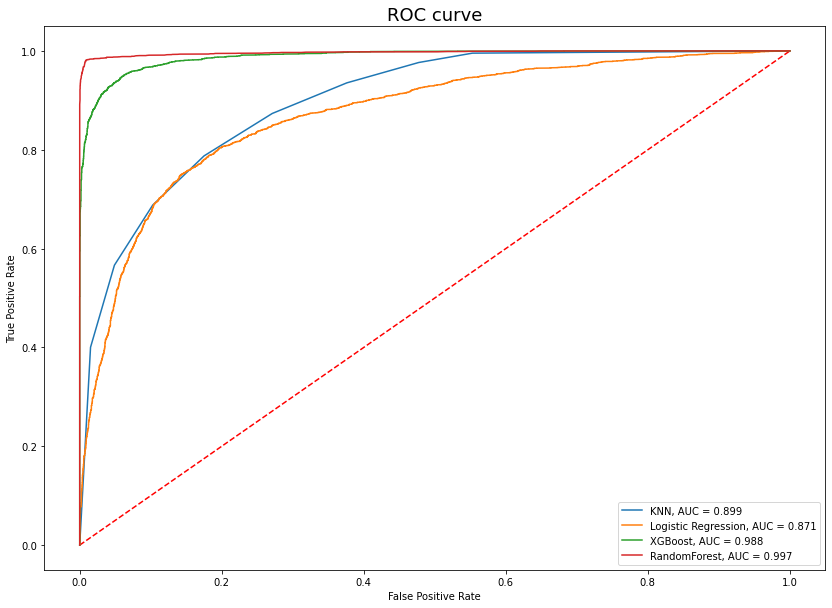

In [94]:
#ROC AUC
fig = plt.figure(figsize=(14,10))
plt.plot([0, 1], [0, 1],'r--')
#KNN
preds_proba_knn = knnneigh.predict_proba(x_test)
probsknn = preds_proba_knn[:, 1]
fpr, tpr, thresh = metrics.roc_curve(y_test, probsknn)
aucknn = roc_auc_score(y_test, probsknn)
plt.plot(fpr, tpr, label=f'KNN, AUC = {str(round(aucknn,3))}')

#Logistic Regression
preds_proba_lg = logreg.predict_proba(x_test)
probslg = preds_proba_lg[:, 1]
fpr, tpr, thresh = metrics.roc_curve(y_test, probslg)
auclg = roc_auc_score(y_test, probslg)
plt.plot(fpr, tpr, label=f'Logistic Regression, AUC = {str(round(auclg,3))}')
#XGBoost
preds_proba_xgb = xgb.predict_proba(x_test)
probsxgb = preds_proba_xgb[:, 1]
fpr, tpr, thresh = metrics.roc_curve(y_test, probsxgb)
aucxgb = roc_auc_score(y_test, probsxgb)
plt.plot(fpr, tpr, label=f'XGBoost, AUC = {str(round(aucxgb,3))}')
#RandomForest
preds_proba_rf = r_forest.predict_proba(x_test)
probsrf = preds_proba_rf[:, 1]
fpr, tpr, thresh = metrics.roc_curve(y_test, probsrf)
aucrf = roc_auc_score(y_test, probsrf)
plt.plot(fpr, tpr, label=f'RandomForest, AUC = {str(round(aucrf,3))}')
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.title("ROC curve")
plt.rcParams['axes.titlesize'] = 18
plt.legend()
plt.show()

### From the above ROC curve, it is clearly evident that Random Forest model predicts with highest accuracy value of 98% and highest AUC value for 0.997 for defaultered loan status.